## Does money make people happy?
Let's get some data, plot them, see if we can see a trend. 

We will go through a few steps:
1. *Model selection* - select a model that your data seem to fit in.
2. Define the parameter values that will the model perform best:
    - use a *utility function (or fitness function)* that measures how *good* your model is.
    - use a *cost function* that measures the distance between the model's predictions and the training examples; the objective is to minimize the distance.
    
    For example: Linear Regressions: you feed in your training examples and it finds the parameters that make the linear model fit best to your data. This is called *training* the model.


3. Run the model to make predictions.

We are going to use the Better Life Index data downloaded from [OECD](https://homl.info/4) website:
https://raw.githubusercontent.com/csbfx/advpy122-data/master/OECD_better_life_index.csv

and the GDP per capita USD data downloaded from [IMF](https://homl.info/5) website:
https://raw.githubusercontent.com/csbfx/advpy122-data/master/IMF_GDP_per_capita_USD.csv

### Part 1: (2 points)
Create two dataframes: 
1. A dataframe from the Better Life Index data that contains two columns: `Country` and `Life satisfaction`. Extract the data from the Better Life Index csv file where INEQUALITY = 'TOT' and Indicator = "Life satisfaction" and the data in the `Value` column should be used for the `Life satisfaction` column in the dataframe.
2. A dataframe from the IMF GDP data that contains two columns: `Country` and `GDP per capita (USD)` where data from column `2020` should be used to fill the column `GDP per capita (USD)`. Use `encoding='latin-1'` when reading the csv file using pandas.

In [100]:
better_life_index = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/OECD_better_life_index.csv"
GDP_per_capita = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/IMF_GDP_per_capita_USD.csv"

In [101]:
# Data frame #1
# Your code here . . .
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
blife = pd.read_csv(better_life_index)

blife
cond = (blife["INEQUALITY"] == "TOT") & (blife["Indicator"] == "Life satisfaction") 

col = ["Country", "Value"]
blife = blife[cond]
blife = blife[col]
blife.columns = ["Country", "Life satisfaction"]
blife

,Country,Life satisfaction
1813,Australia,7.3
1814,Austria,7.1
1815,Belgium,6.9
1816,Canada,7.4
1817,Czech Republic,6.7
1818,Denmark,7.6
1819,Finland,7.6
1820,France,6.5
1821,Germany,7.0
1822,Greece,5.4


In [102]:
# Data frame #2 
# Your code here . . .
gdp = pd.read_csv(GDP_per_capita, encoding='latin-1', thousands=',', na_values="n/a")

gdp["GDP per capita (USD)"] = gdp["2020"]
col = ["Country", "GDP per capita (USD)"]
gdp = gdp[col]
gdp

,Country,GDP per capita (USD)
0,Afghanistan,499.441
1,Albania,4898.280
2,Algeria,3331.080
3,Angola,2021.310
4,Antigua and Barbuda,14158.570
...,...,...
192,Yemen,645.126
193,Zambia,1001.440
194,Zimbabwe,921.847
195,NaN,NaN


### Part 2: Merge the two dataframes by common country names, store the merged dataframe in `merged`. (3 points)

In [103]:
# Merge the two dataframes by common country names
# Your code here . . .
merged = pd.merge(gdp, blife, on="Country")
merged

,Country,GDP per capita (USD),Life satisfaction
0,Australia,51885.47,7.3
1,Austria,48634.34,7.1
2,Belgium,43813.77,6.9
3,Brazil,6450.45,6.4
4,Canada,42080.05,7.4
5,Chile,12612.32,6.5
6,Colombia,5207.24,6.3
7,Czech Republic,22627.47,6.7
8,Denmark,58438.85,7.6
9,Estonia,22985.86,5.7


### Part 3: Plot the relationship between `GDP per capita (USD)` and `Life satisfaction` (2 points)

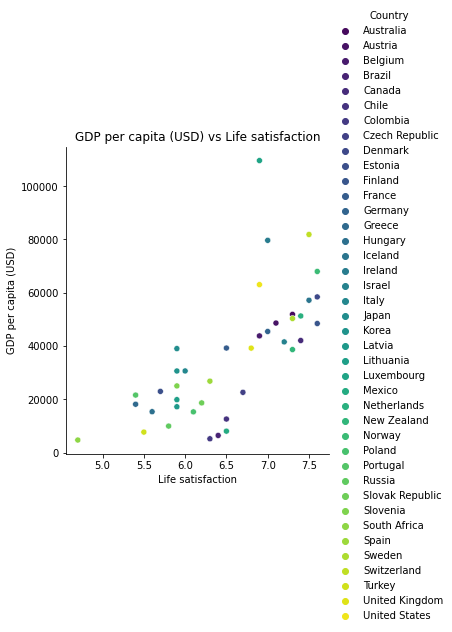

In [104]:
# Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt 

g = sns.relplot(
    data=merged,
    x="Life satisfaction",
    y="GDP per capita (USD)",
    hue="Country",
    sizes=(2,150),
    palette="viridis"
)
plt.title("GDP per capita (USD) vs Life satisfaction");

### Part 4: Use Scikit-Learn the following code earn to build a linear model using Linear Regression (3 points)
- Predict the Life Satisfaction of Cyprus based on its GDP per capita.

In [105]:
import sklearn.linear_model as sklm
# select a linar model
model = sklm.LinearRegression()

In [106]:
# Train the model
import numpy as np
X = np.c_[merged["GDP per capita (USD)"]] # The feature
y = np.c_[merged["Life satisfaction"]] # The values we try to model

model.fit(X, y)

LinearRegression()

In [107]:
# Make a prediction for Cyprus
Cyprus_GDP = gdp[gdp['Country'] == 'Cyprus'] #  YOUR CODE HERE . . . 
Cyprus_GDP
X_new = [[26240.05]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.31850263]]
